In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [120]:
data = pd.read_csv("quasar_train.csv", dtype={ 'a': np.float })

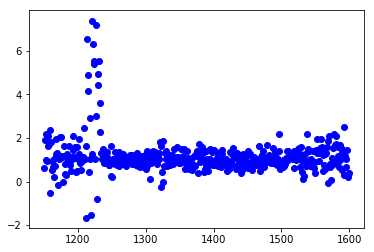

In [180]:
xs = np.array([([1, x]) for x in range(1150, 1600)])
row = np.array(range(1150, 1600))
ys = data.iloc[0].tolist()

plt.scatter(row, ys, color='blue', marker='o')
plt.show()

In [151]:
print(xs)

[[   1 1150]
 [   1 1151]
 [   1 1152]
 [   1 1153]
 [   1 1154]
 [   1 1155]
 [   1 1156]
 [   1 1157]
 [   1 1158]
 [   1 1159]
 [   1 1160]
 [   1 1161]
 [   1 1162]
 [   1 1163]
 [   1 1164]
 [   1 1165]
 [   1 1166]
 [   1 1167]
 [   1 1168]
 [   1 1169]
 [   1 1170]
 [   1 1171]
 [   1 1172]
 [   1 1173]
 [   1 1174]
 [   1 1175]
 [   1 1176]
 [   1 1177]
 [   1 1178]
 [   1 1179]
 [   1 1180]
 [   1 1181]
 [   1 1182]
 [   1 1183]
 [   1 1184]
 [   1 1185]
 [   1 1186]
 [   1 1187]
 [   1 1188]
 [   1 1189]
 [   1 1190]
 [   1 1191]
 [   1 1192]
 [   1 1193]
 [   1 1194]
 [   1 1195]
 [   1 1196]
 [   1 1197]
 [   1 1198]
 [   1 1199]
 [   1 1200]
 [   1 1201]
 [   1 1202]
 [   1 1203]
 [   1 1204]
 [   1 1205]
 [   1 1206]
 [   1 1207]
 [   1 1208]
 [   1 1209]
 [   1 1210]
 [   1 1211]
 [   1 1212]
 [   1 1213]
 [   1 1214]
 [   1 1215]
 [   1 1216]
 [   1 1217]
 [   1 1218]
 [   1 1219]
 [   1 1220]
 [   1 1221]
 [   1 1222]
 [   1 1223]
 [   1 1224]
 [   1 1225]
 [   1 1226]

In [155]:
def thetas(x, y):
    return inv(np.transpose(x).dot(x)).dot(np.transpose(x)).dot(y)

print(thetas(xs, ys))

[  2.51339906e+00  -9.81122145e-04]


In [158]:
t = thetas(xs, ys)
print(t)

[  2.51339906e+00  -9.81122145e-04]


In [160]:
hypothesis = [np.transpose(t).dot(x) for x in xs]

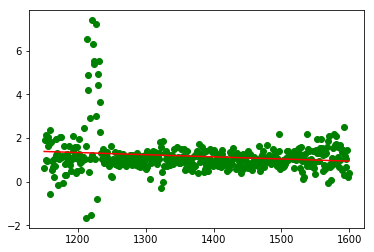

In [186]:
plt.plot(row, ys, 'go')
plt.plot(row, hypothesis, 'r-');
plt.show();

In [216]:
def get_weight(x, xi, tau):
    return np.exp(-((x - xi) ** 2)/(2 * tau ** 2));

def diag_matr(x, x_arr, tau):
    tmp = np.diag([get_weight(x, xi, tau) for xi in x_arr]);
    for i in range(0, len(x_arr)):
        if tmp[i][i] < 0.1e-100:
            tmp[i][i] = 0.1e-100
    return tmp

In [222]:
def weighted_thetas(x, x_arr, x_row, y_arr, tau):
    weights = diag_matr(x, x_row, tau);
    return inv(np.transpose(x_arr).dot(weights).dot(x_arr)).dot(np.transpose(x_arr)).dot(weights).dot(y_arr)

In [223]:
wt = weighted_thetas(1200, xs, row, ys, 5)

In [224]:
wt

array([  8.00352563e-01,   2.88344269e-04])

In [225]:
xses = []
yses = []

for x in range(1150, 1600, 5):
    b, a = weighted_thetas(x, xs, row, ys, 5)
    y = a * x + b
    xses.append(x)
    yses.append(y)
    


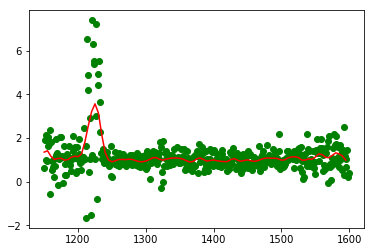

In [226]:
plt.plot(row, ys, 'go')
plt.plot(xses, yses, 'r-');
plt.show();